In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("./mpl_style")
from panel_label import add_panel_label

In [2]:
# quick and dirty definition
x0 = 0
x1 = 0.5
x2 = 1
xL = np.linspace(x0, x1, 100)
xR = np.linspace(x1, x2, 100)

q1 = 4*(xL - x0)*(x1 - xL) / (x1 - x0)**2
q2 = np.zeros_like(q1)
q3 = (2*xL - x1 - x0)*(xL - x0) / (x1 - x0)**2
q4 = (2*xR - x2 - x1)*(xR - x2) / (x2 - x1)**2
dq1 = 4*(-2*xL + x1 + x0) / (x1 - x0)**2
dq2 = np.zeros_like(dq1)
dq3 = (4*xL - x1 - 3*x0) / (x1 - x0)**2
dq4 = (4*xR - x1 - 3*x2) / (x2 - x1)**2

c1 = 3*((xL - x0)/(x1 - x0))**2 - 2*((xL - x0)/(x1 - x0))**3
c2 = 3*((x2 - xR)/(x2 - x1))**2 - 2*((x2 - xR)/(x2 - x1))**3
c3 = (xL - x1) * ((xL - x0)/(x1 - x0))**2
c4 = (xR - x1) * ((xR - x2)/(x2 - x1))**2
dc1 = 6*(xL - x0)/(x1 - x0)**2 - 6*(xL - x0)**2 / (x1 - x0)**3
dc2 = -6*(x2 - xR)/(x2 - x1)**2 + 6*(x2 - xR)**2 / (x2 - x1)**3
dc3 = (2*(xL - x1)*(xL - x0) + (xL - x0)**2) / (x1 - x0)**2
dc4 = (2*(xR - x1)*(xR - x2) + (xR - x2)**2) / (x2 - x1)**2

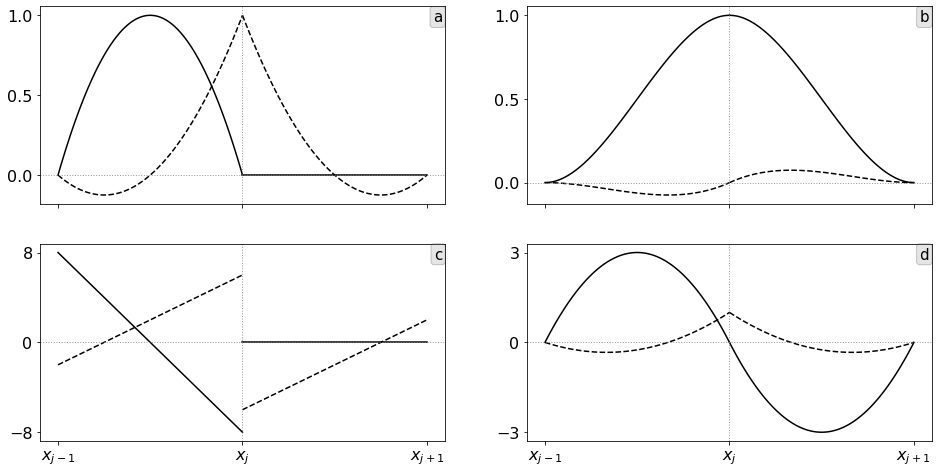

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8), sharex="all")
axes = ax.flatten()
for idx, h in enumerate([(q1, q3), (c1, c3), (dq1, dq3), (dc1, dc3)]):
  axes[idx].plot(xL, h[0], color="black")
  axes[idx].plot(xL, h[1], color="black", linestyle="dashed")
for idx, h in enumerate([(q2, q4), (c2, c4), (dq2, dq4), (dc2, dc4)]):
  axes[idx].plot(xR, h[0], color='black')
  axes[idx].plot(xR, h[1], color='black', linestyle='dashed')
for axi in axes:
  axi.axhline(y=0, color='grey', linestyle='dotted', lw=1, alpha=0.8)
  axi.axvline(x=x1, color='grey', linestyle='dotted', lw=1, alpha=0.8)

[axi.set_xticks([x0, x1, x2]) for axi in axes]
[axi.set_xticklabels([r'$x_{j - 1}$', r'$x_j$', r'$x_{j + 1}$']) for axi in axes[2::]]
[axi.set_yticks([0, 0.5, 1]) for axi in axes[0:2]]
axes[2].set_yticks([-8, 0, 8])
axes[3].set_yticks([-3, 0, 3])

[add_panel_label(axi, panel, loc="top right") for axi, panel in zip(axes, "abcd")]
fig.savefig(
  "../04-legolas/figures/basisfunctions.png", 
  bbox_inches="tight", 
  dpi=400,
)

plt.show()